In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [155]:
global_temp = pd.read_csv('Global temperature.csv')
global_temp.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [156]:
global_temp = global_temp.query('year >= 1828 and year <=2013')

global_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 78 to 263
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      186 non-null    int64  
 1   avg_temp  186 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


In [157]:
seattle_temp = pd.read_csv('Seattle temperature.csv')
seattle_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      186 non-null    int64  
 1   city      186 non-null    object 
 2   country   186 non-null    object 
 3   avg_temp  183 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.9+ KB


In [158]:
LA_temp = pd.read_csv('Los Angeles.csv')

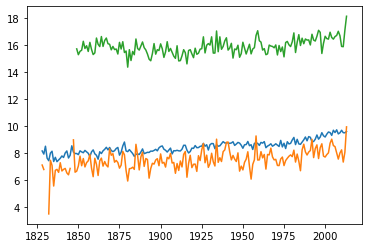

In [159]:
plt.plot(global_temp.year , global_temp.avg_temp)
plt.plot(seattle_temp.year , seattle_temp.avg_temp)
plt.plot(LA_temp.year , LA_temp.avg_temp)

10 years Moving avearge of temperatures for global data and seattle data

In [160]:
global_temp['tenday']= global_temp.iloc[:,1].rolling(window = 10).mean()
seattle_temp['tenday']= seattle_temp.iloc[:,3].rolling(window = 10).mean()
LA_temp['tenday']= LA_temp.iloc[:,3].rolling(window = 10).mean()
mn_temp['tenday']= mn_temp.iloc[:,3].rolling(window = 10).mean()

<ipython-input-160-54646e8a50aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mn_temp['tenday']= mn_temp.iloc[:,3].rolling(window = 10).mean()


In [161]:
global_temp , seattle_temp

(     year  avg_temp  tenday
 78   1828      8.17     NaN
 79   1829      7.94     NaN
 80   1830      8.52     NaN
 81   1831      7.64     NaN
 82   1832      7.45     NaN
 ..    ...       ...     ...
 259  2009      9.51   9.493
 260  2010      9.70   9.543
 261  2011      9.52   9.554
 262  2012      9.51   9.548
 263  2013      9.61   9.556
 
 [186 rows x 3 columns],
      year     city        country  avg_temp  tenday
 0    1828  Seattle  United States      7.13     NaN
 1    1829  Seattle  United States      6.80     NaN
 2    1830  Seattle  United States       NaN     NaN
 3    1831  Seattle  United States       NaN     NaN
 4    1832  Seattle  United States      3.52     NaN
 ..    ...      ...            ...       ...     ...
 181  2009  Seattle  United States      8.02   8.212
 182  2010  Seattle  United States      8.25   8.265
 183  2011  Seattle  United States      7.35   8.210
 184  2012  Seattle  United States      8.08   8.215
 185  2013  Seattle  United States      9.

Correlation between global temperature and seattle temperature

In [162]:
x = global_temp.avg_temp  
y = seattle_temp.avg_temp

In [163]:
x.corr(y)

0.25325566401035116

In [164]:
y.corr(x)

0.25325566401035116

In [165]:
np.corrcoef(x,y)

array([[ 1., nan],
       [nan, nan]])

In [166]:
# Joining global and citywise datasets to get a combine dataset on the basis of year

In [167]:
global_temp , global_temp

(     year  avg_temp  tenday
 78   1828      8.17     NaN
 79   1829      7.94     NaN
 80   1830      8.52     NaN
 81   1831      7.64     NaN
 82   1832      7.45     NaN
 ..    ...       ...     ...
 259  2009      9.51   9.493
 260  2010      9.70   9.543
 261  2011      9.52   9.554
 262  2012      9.51   9.548
 263  2013      9.61   9.556
 
 [186 rows x 3 columns],
      year  avg_temp  tenday
 78   1828      8.17     NaN
 79   1829      7.94     NaN
 80   1830      8.52     NaN
 81   1831      7.64     NaN
 82   1832      7.45     NaN
 ..    ...       ...     ...
 259  2009      9.51   9.493
 260  2010      9.70   9.543
 261  2011      9.52   9.554
 262  2012      9.51   9.548
 263  2013      9.61   9.556
 
 [186 rows x 3 columns])

In [182]:
df1 = pd.merge(global_temp,seattle_temp[['year' ,'avg_temp','tenday']] , on = 'year' , suffixes = ('_global','_seattle'))

In [183]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 185
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              186 non-null    int64  
 1   avg_temp_global   186 non-null    float64
 2   tenday_global     177 non-null    float64
 3   avg_temp_seattle  183 non-null    float64
 4   tenday_seattle    163 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 8.7 KB


In [184]:
df = pd.merge(df1,LA_temp[['year' ,'avg_temp','tenday']] , on = 'year')
#df.info()

In [185]:
df['avg_temp_global'].corr(df['avg_temp_seattle'])

0.5759989409317535

In [187]:
df['avg_temp'].corr(df['avg_temp_seattle'])

0.6209073771286743

In [177]:
all_temp = pd.read_csv('all_cities_temp.csv')
all_temp.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [191]:
mn_temp= all_temp.query('city == "Minneapolis"')
mn_temp['tenday']= mn_temp.iloc[:,3].rolling(window = 10).mean()

<ipython-input-191-92cbc4f5f13d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mn_temp['tenday']= mn_temp.iloc[:,3].rolling(window = 10).mean()


In [192]:
#all_temp.city.unique()

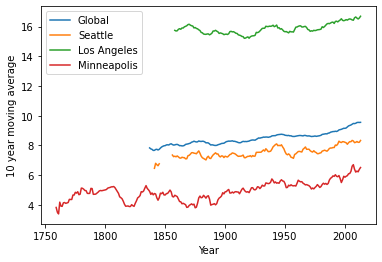

In [193]:
plt.plot(global_temp.year , global_temp.tenday , label = 'Global')
plt.plot(seattle_temp.year , seattle_temp.tenday , label = 'Seattle')
plt.plot(LA_temp.year , LA_temp.tenday , label = 'Los Angeles')
plt.plot(mn_temp.year , mn_temp.tenday , label = 'Minneapolis')
plt.xlabel('Year')
plt.ylabel('10 year moving average')
plt.legend()
plt.show()

In [197]:
df2 = pd.merge(df,mn_temp[['year' ,'avg_temp','tenday']] , on = 'year', suffixes = ('_LA','_MN') )
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              165 non-null    int64  
 1   avg_temp_global   165 non-null    float64
 2   tenday_global     165 non-null    float64
 3   avg_temp_seattle  165 non-null    float64
 4   tenday_seattle    158 non-null    float64
 5   avg_temp_LA       165 non-null    float64
 6   tenday_LA         156 non-null    float64
 7   avg_temp_MN       165 non-null    float64
 8   tenday_MN         165 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 12.9 KB


In [ ]:
df2['avg_temp_global'].corr(df2[])